In [4]:
import glob
import pandas as pd
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.probability import FreqDist
import sys
import codecs
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\himanshu_bhujbal.CIQ
[nltk_data]     HYD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\himanshu_bhujbal
[nltk_data]     .CIQHYD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:


pdf_dir = "Word_tokenizer\\PDF_file" #enter the path where pdf profile are kept

def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)

    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)

        text = fake_file_handle.getvalue()

    # close open handles
    converter.close()
    fake_file_handle.close()

    if text:
        return text
        print(file)
   


#this for loop is to extract all the data form PDF and save it into a variable and then append it into a csv    
for file in glob.glob("%s/*.pdf" % pdf_dir): # this line of code is looking for pdf file in the given path
     if __name__ == '__main__':        
        df2 = extract_text_from_pdf(file)
        f = open("Summary_of_profile.csv", "a")
        f.write(df2)
        f.close()
    

In [8]:
import csv


with open('Summary_of_profile.csv', 'r') as file:
    reader = csv.reader(file, delimiter = ' ')
    
    for row in reader:
        df2 = str(row)


In [13]:
from nltk.probability import FreqDist
import sys
import codecs
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#this function is to tokenize the file
def tokenize(obj):
    if obj is None:
        return None
    elif isinstance(obj, str): 
        return word_tokenize(obj)
    elif isinstance(obj, list):
        return [tokenize(i) for i in obj]
    else:
        return obj 
    

ztokenizer = nltk.RegexpTokenizer(r"\w+")
text_token = ztokenizer.tokenize(df2)


# convert to lower case
tokens = [w.lower() for w in text_token]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# filter out stop words
sw_list = ['months','year','years','com','linkedin','linkedin','comwww','india','new','technology','gmail']
stopword =stopwords.words('english')
#this helps in appending the code 
stopword.extend(sw_list)
words = [w for w in words if not w in stopword]




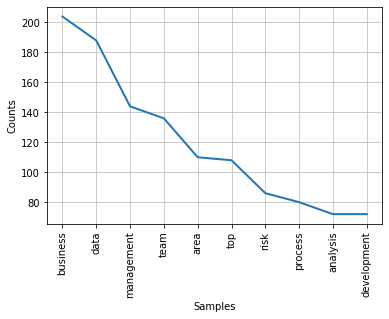

In [12]:
#this is graphical presentation of most used words

fdist1 = FreqDist(words)
# print (fdist1)
fdist1.plot(10)